In [3]:
%matplotlib inline

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import random

random.seed(12345)
np.random.seed(5345436)

In [61]:
def two_samples(base_mean, base_sd, difference, N = 6500, delta_variance = 0.0):
    As = np.random.normal(loc = base_mean, scale = base_sd, size = N)
    Bs = np.random.normal(loc = base_mean + difference, scale = base_sd + delta_variance, size = N)
    return As, Bs

def one_sided_ttest(A, B, equal_var = True):
    t,p = stats.ttest_ind(A, B, equal_var = equal_var)
    # the t-test implemented in scipy is two sided, but we are interested
    # in the one sided p-value, hence this if statement and the divide by two.
    if t < 0:
        p /= 2.0
    else:
        p = 1 - p/2.0

    return p

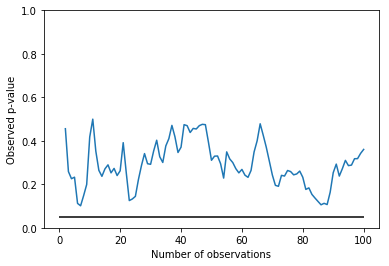

In [85]:
# There is no difference between the two samples
As, Bs = two_samples(6.0, 1.0, difference = 0.0, N = 100)
p_vals = []
for n in range(2, len(As) + 1):
    p_vals.append(one_sided_ttest(As[:n], Bs[:n]))

a = plt.axes()
a.plot(np.arange(len(As) - 1) + 2, p_vals)
a.set_ylabel("Observed p-value")
a.set_xlabel("Number of observations")
a.set_ylim([0.0, 1.0])
a.hlines(0.05, 0, 100)


In [80]:
range(1,len(As)-1)


range(1, 99)

In [77]:
As[:102]

array([ 6.12318773,  7.33262751,  5.26098981,  4.83691485,  6.84921507,
        6.63730429,  5.95396987,  6.38467615,  5.51825265,  5.82228377,
        7.07138475,  7.21531744,  5.55695467,  6.11514011,  6.02208777,
        6.86718605,  7.01331469,  7.58854589,  5.94982462,  5.7265288 ,
        7.60809281,  6.2088081 ,  5.40840962,  4.02490341,  6.43753284,
        5.29820505,  6.63869717,  6.69382805,  5.13262838,  3.74783494,
        4.47499674,  5.06621522,  6.19999446,  6.06953735,  5.15713276,
        5.46260756,  4.57591429,  7.07079952,  4.77140425,  7.67938108,
        6.65156432,  5.63218976,  6.86512888,  6.09634132,  4.76930193,
        7.51560753,  6.07000151,  5.39644802,  6.22444984,  6.81707052,
        5.86729047,  6.42293637,  5.99156813,  8.82121175,  5.38077677,
        5.06921407,  5.7107621 ,  6.3368218 ,  4.25133239,  7.02763003,
        3.55508468,  4.34058951,  7.804616  ,  4.06526351,  7.66832151,
        5.3947243 ,  3.91084907,  5.97232732,  6.36893724,  6.00

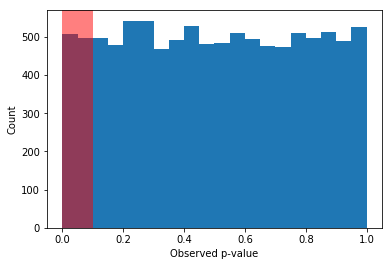

In [48]:
def repeat_experiment(repeats = 10000, diff = 0.):
    p_values = []
    for i in range(repeats):
        A,B = two_samples(base_mean = 6.0, base_sd = 1, difference = 0, N = 100, delta_variance = 0.0)
        p = one_sided_ttest(A, B)
        p_values.append(p)
    
    plt.hist(p_values, range = (0, 1.0), bins=20)
    plt.axvspan(0., 0.1, facecolor = "red", alpha = 0.5)
    plt.xlabel("Observed p-value")
    plt.ylabel("Count")
    
repeat_experiment()

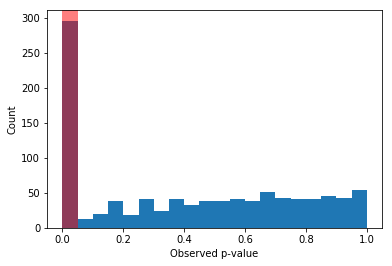

In [89]:
def repeat_early_stop_experiment(repeats = 1000, diff = 0.0):
    p_values = []
    for i in range(repeats):
        A,B = two_samples(base_mean = 6.0, base_sd = 1, difference = 0, N = 100, delta_variance = 0.0)

        for n in range(2, len(A) - 1):
            p = one_sided_ttest(A[:n], B[:n])
            if p < 0.05:
                break
            
        p_values.append(p)
    
    plt.hist(p_values, range = (0, 1.0), bins = 20)
    plt.axvspan(0.0, 0.05, facecolor = "red", alpha = 0.5)
    plt.xlabel("Observed p-value")
    plt.ylabel("Count")
    
repeat_early_stop_experiment()

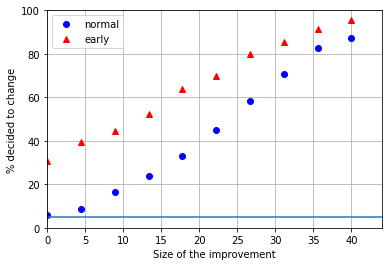

In [97]:
def keep_or_not(improvement, threshold = 0.05, N = 100, repeats = 1000, early_stop = False):
    keep = 0
    for i in range(repeats):
        A,B = two_samples(base_mean = 6.0, base_sd = 1, difference = improvement, N = N, delta_variance = 0.0)

        if early_stop:
            for n in range(2, len(A) - 1):
                p = one_sided_ttest(A[:n], B[:n])
                if p < 0.05:
                    break

        else:
            p = one_sided_ttest(A, B)
            
        if p <= threshold:
            keep += 1
            
    return float(keep) / repeats

def power_plot(improvements, normal_keeps, early_keeps):
    plt.plot(improvements, normal_keeps, "bo", label = "normal")
    plt.plot(improvements, early_keeps, "r^", label = "early")
    
    plt.legend(loc = "best")
    plt.ylim((0, 100))
    plt.xlim((0, improvements[-1] * 1.1))
    plt.grid()
    plt.xlabel("Size of the improvement")
    plt.ylabel("% decided to change")
    plt.axhline(5)
improvements = np.linspace(0.0, 40, 10)

keeps = []
early_keeps = []
for improvement in improvements:
    keeps.append(keep_or_not(improvement / 100.0) * 100)
    early_keeps.append(keep_or_not(improvement / 100.0, early_stop = True) * 100)

power_plot(improvements, keeps, early_keeps)

In [102]:
def false_positives(repeats = 1000, early_stop = False, threshold = 0.05):
    switches = 0
    for i in range(repeats):
        A,B = two_samples(base_mean = 6.0, base_sd = 1, difference = 0.0, N = 100, delta_variance = 0.0)

        if early_stop:
            for n in range(2, len(A)):
                p = one_sided_ttest(A[:n], B[:n])
                if p < threshold:
                    break
                    
        else:
            p = one_sided_ttest(A, B)
        
        if p < threshold:
            switches += 1

    return float(switches) / repeats

print("Normal stopping strategy:", false_positives())
print("Early stopping strategy:", false_positives(early_stop=True))

Normal stopping strategy: 0.05
Early stopping strategy: 0.284


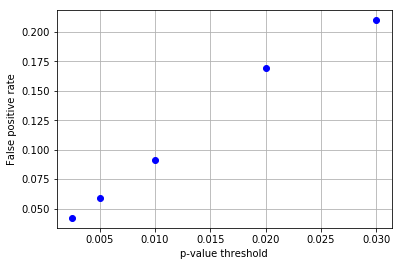

In [103]:
thresholds = (0.0025, 0.005, 0.01, 0.02, 0.03)
fp_rates = [false_positives(threshold = p, early_stop = True) for p in thresholds]

plt.plot(thresholds, fp_rates, "bo")
plt.xlabel("p-value threshold")
plt.ylabel("False positive rate")
plt.grid()

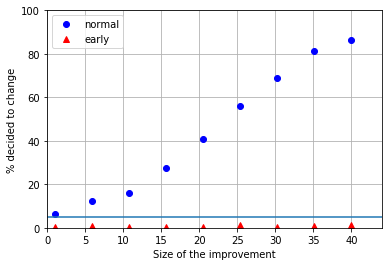

In [104]:
improvements = np.linspace(1., 40, 9)

keeps = []
early_keeps = []
for improvement in improvements:
    keeps.append(keep_or_not(improvement/100.)*100)
    early_keeps.append(keep_or_not(improvement/100.,
                                   early_stop=True,
                                   threshold=0.005)*100)

power_plot(improvements, keeps, early_keeps)

In [24]:
a = two_samples(base_mean = 10.0, base_sd = 2.0, difference = 0.0, N = 50, delta_variance = 0.0)

In [25]:
a


(array([ 11.0213606 ,  10.36380033,   7.53721012,   9.17964752,
         13.1998324 ,   8.14138232,  11.34918506,  12.31810512,
          9.96536699,  10.28035067,   7.49365275,   7.2959305 ,
         14.54313534,  11.23710461,  13.54009693,  12.67592443,
          9.15712098,   6.94776883,   5.28930189,   5.71619925,
          7.79960126,  10.24223858,  11.29015   ,   7.42190852,
         10.91206976,   8.08148957,   8.5895223 ,   5.047749  ,
         10.41430094,   9.88050014,   6.9639963 ,   9.01443777,
          7.43614071,   6.35994625,   7.57464991,   8.66566856,
          9.96430412,  11.29986534,  11.33620362,  13.12042176,
         14.58551838,   7.85800169,  11.51211011,   9.84897782,
         11.1619947 ,   9.85775225,  12.11006054,   7.99954529,
         11.45459849,  12.64874422]),
 array([ 14.15313692,   8.32236704,  11.9446729 ,  12.08289299,
         10.43399406,  11.67891939,  10.90319072,   9.56776028,
         10.26668245,   7.95270978,  12.41333252,  10.09065277,
  

In [30]:
def two_samples(difference, N=6500, delta_variance=0.):
    As = np.random.normal(6., size=N)
    Bs = np.random.normal(6. + difference, scale=1+delta_variance, size=N)
    return As, Bs

def one_sided_ttest(A, B, equal_var=True):
    t,p = stats.ttest_ind(A, B, equal_var=equal_var)
    # the t-test implemented in scipy is two sided, but we are interested
    # in the one sided p-value, hence this if statement and the divide by two.
    if t < 0:
        p /= 2.
    else:
        p = 1- p/2.

    return p

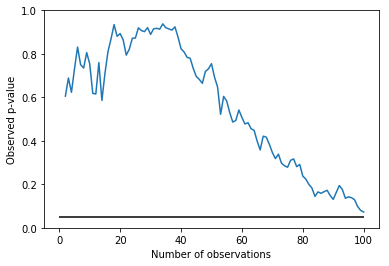

In [38]:
# There is no difference between the two samples
As, Bs = two_samples(0., N=100)
p_vals = []
for n in range(len(As)-1):
    n += 2
    p_vals.append(one_sided_ttest(As[:n], Bs[:n]))

a = plt.axes()
a.plot(np.arange(len(As)-1)+2, p_vals)
a.set_ylabel("Observed p-value")
a.set_xlabel("Number of observations")
a.set_ylim([0., 1.])
a.hlines(0.05, 0, 100)